In [2]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR


# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)  # make sure that all data are float type
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


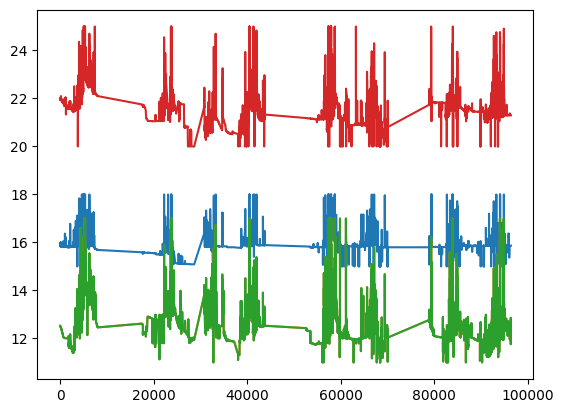

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=25, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

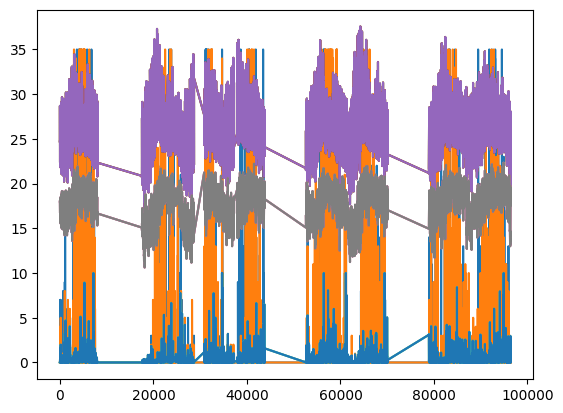

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=35, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=35, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=10, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

In [6]:
df = df.diff()
df = df.drop(index=0)  # remove NaN
df.shape

(59656, 15)

In [7]:
df = df.rolling(window=168).mean()
df.dropna(inplace=True)
df.shape

(59489, 15)

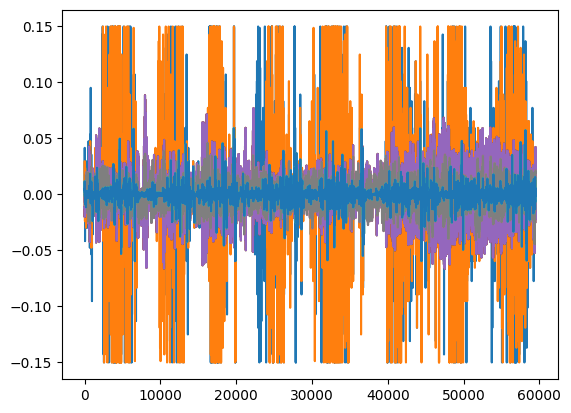

In [8]:
weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
weather_data = weather_data.clip(upper=0.15, lower=-0.15, axis=0)
weather_data = weather_data.to_numpy()
plt.plot(weather_data)

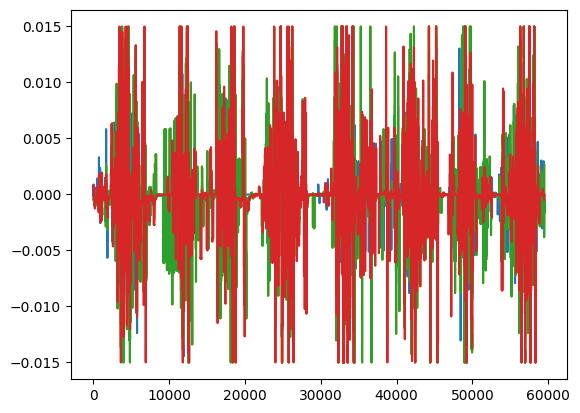

In [9]:
water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
water_data = water_data.clip(upper=0.015, lower=-0.015, axis=0)
water_data = water_data.to_numpy()
plt.plot(water_data)

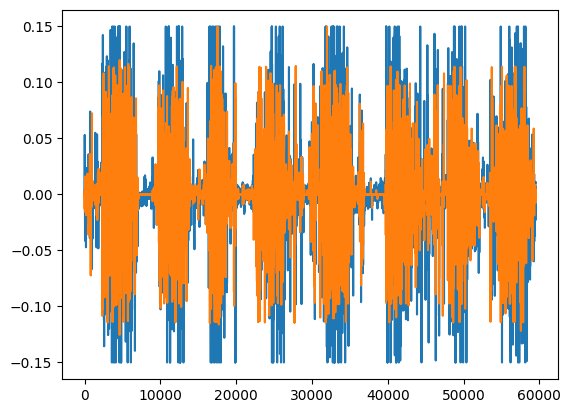

In [11]:
# combine data
dataset = np.hstack((weather_data, water_data))

# compute covariance matrix
cov_matrix = np.cov(dataset, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 4  # number of features to preserve
dataset = np.matmul(dataset, sorted_eigenvectors[:,:k]) # transform the original data
dataset = dataset[:, [1, 3]]
dataset = np.clip(dataset, -0.15, 0.15)
plt.plot(dataset)

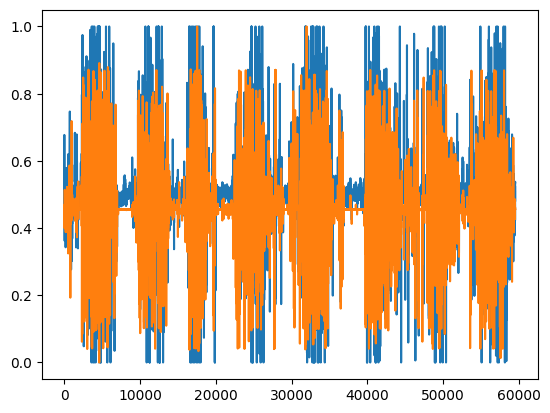

In [12]:
# normalize input data
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
plt.plot(dataset)

In [48]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, shuffle=False)

In [51]:
model = VAR(train)
model_fitted = model.fit()

In [57]:

print(test.shape)

actual_values = test[:, 0]  
predicted_values = test[:, 1]  

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_values, predicted_values)


print(f"Mean Absolute Error: {mae}")


(11898, 2)
Mean Absolute Error: 0.054908536269645536
